In [2]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

Viscocity

[-1.84649023e+01  3.22324397e+00 -3.40025918e-01  1.49554879e-02]


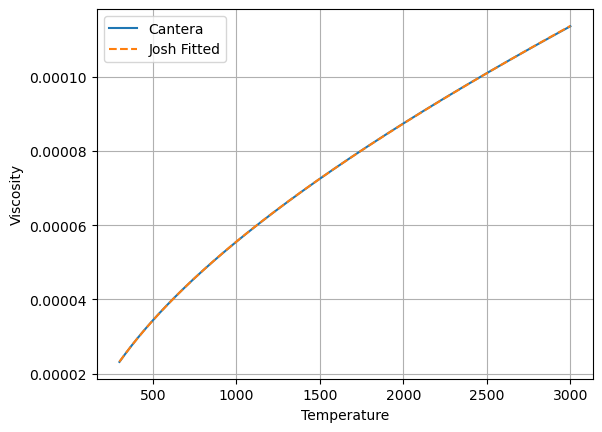

In [104]:
gas = ct.Solution("FFCM2_H2_Ar.yaml")
v_coeffs = gas.get_viscosity_polynomial(gas.species_index("AR"))
temp_arr = np.linspace(300, 3000, 1000)
mu_arr = np.polyval(v_coeffs[::-1], np.log(temp_arr))**2 * np.sqrt(temp_arr)

X = np.vander(np.log(temp_arr), 4)
y = np.log(mu_arr / 0.1)
# Solve the normal equations: (XᵀX)β = Xᵀy
beta = np.linalg.solve(X.T @ X, X.T @ y)

print(beta[::-1])   # Coefficients of the 3rd-degree polynomial

y_fit = X @ beta
mu_fit = np.exp(y_fit) * 0.1

#beta_of = [-1.988E+01, 3.416E+00, -3.631E-01, 1.586E-02]  # μ1 to μ4
#log_mu_of = beta_of[0] + np.log(temp_arr) * (beta_of[1] + np.log(temp_arr) * (beta_of[2] + np.log(temp_arr) * beta_of[3]))

#mu_of = 0.1 * np.exp(log_mu_of)

plt.plot(temp_arr, mu_arr, label='Cantera')
plt.plot(temp_arr, mu_fit, '--', label='Josh Fitted')
#plt.plot(temp_arr, mu_of, ':', label='detonationFoam')
plt.xlabel('Temperature')
plt.ylabel('Viscosity')
plt.legend()
plt.grid(True)
plt.show()


Thermal Conductivity

[-2.37715342  3.12828976 -0.32629612  0.0142977 ]


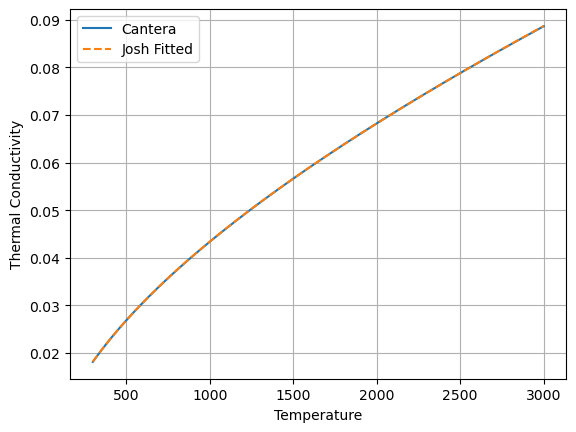

In [ ]:
gas = ct.Solution("FFCM2_H2_Ar.yaml")
tc_coeffs = gas.get_thermal_conductivity_polynomial(gas.species_index("AR"))
temp_arr = np.linspace(300, 3000, 1000)
tc_arr = np.polyval(tc_coeffs[::-1], np.log(temp_arr)) * np.sqrt(temp_arr)

X = np.vander(np.log(temp_arr), 4)
y = np.log(tc_arr / 10**-5)
# Solve the normal equations: (XᵀX)β = Xᵀy
beta = np.linalg.solve(X.T @ X, X.T @ y)

print(beta[::-1])   # Coefficients of the 3rd-degree polynomial

y_fit = X @ beta
tc_fit = np.exp(y_fit) * 10**-5

#beta_of = [5.546E-01, 1.591E+00, -5.282E-02, 4.072E-04]  # lambda1 to lambda4
#log_tc_of = beta_of[0] + np.log(temp_arr) * (beta_of[1] + np.log(temp_arr) * (beta_of[2] + np.log(temp_arr) * beta_of[3]))

#tc_of = 10**-5 * np.exp(log_tc_of)

plt.plot(temp_arr, tc_arr, label='Cantera')
plt.plot(temp_arr, tc_fit, '--', label='Josh Fitted')
#plt.plot(temp_arr, tc_of, ':', label='detonationFoam')
plt.xlabel('Temperature')
plt.ylabel('Thermal Conductivity')
plt.legend()
plt.grid(True)
plt.show()


Binary Diffusion Coefficients

[-1.66518961e+01  3.84610441e+00 -2.83930916e-01  1.22795106e-02]


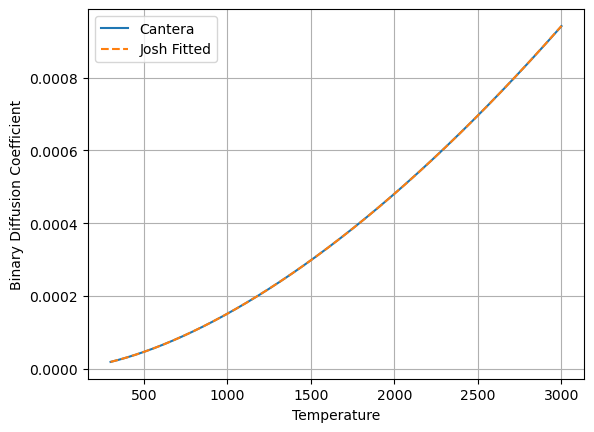

In [150]:
gas = ct.Solution("FFCM2_H2_Ar.yaml")
diff_coeffs = gas.get_binary_diff_coeffs_polynomial(gas.species_index("AR"), gas.species_index("AR"))
temp_arr = np.linspace(300, 3000, 1000)
diff_arr = np.polyval(diff_coeffs[::-1], np.log(temp_arr)) * temp_arr ** 1.5 / gas.P  # NOTE: Divide out pressure. Cantera 

X = np.vander(np.log(temp_arr), 4)
y = np.log(diff_arr / 10**-4)

beta = np.linalg.solve(X.T @ X, X.T @ y)

print(beta[::-1])   # Coefficients of the 3rd-degree polynomial

y_fit = X @ beta
diff_fit = np.exp(y_fit) * 10**-4

#beta_of = [-1.477E+01, 4.195E+00, -3.280E-01, 1.412E-02]  # Diff1 to Diff4
#log_diff_of = beta_of[0] + np.log(temp_arr) * (beta_of[1] + np.log(temp_arr) * (beta_of[2] + np.log(temp_arr) * beta_of[3]))

#diff_of = 10**-4 * np.exp(log_diff_of)

plt.plot(temp_arr, diff_arr, label='Cantera')
plt.plot(temp_arr, diff_fit, '--', label='Josh Fitted')
#plt.plot(temp_arr, diff_of, ':', label='detonationFoam')
plt.xlabel('Temperature')
plt.ylabel('Binary Diffusion Coefficient')
plt.legend()
plt.grid(True)
plt.show()